# Lab 26 - Permutation tests

In Lab 5 we looked used confidence intervals to compare the means of two groups to determine if they were different.  In this lab, we'll use hypothesis testing to compare the means.

First, we'll download the green taxi trip data for Dec. 5, 2018.

The NYC Open Data datast of all 2018 green taxi trips is here: [https://data.cityofnewyork.us/Transportation/2018-Green-Taxi-Trip-Data/w7fs-fd9i](https://data.cityofnewyork.us/Transportation/2018-Green-Taxi-Trip-Data/w7fs-fd9i)

The dataset contains almost 9 million rows, so we will filter the data to only be trips from Dec. 5, 2018 to make the dataset smaller.  To do this:
- Click on the "Filter" button.
- On the menu that appear, click on "Add a New Filter Condition".
- Choose "lpep_pickup_datetime" but change the "is" to be "is between".
- Click in the box below and a calendar will pop up. Highlight December 5, 2018.
- Click the second box below and a calendar will pop up.  Highlight December 6, 2018.
- It will take a few seconds (it's a large file) but the rows on the left will be filtered to be all trips with pickups between Dec. 5 2018 at 12am and Dec. 6 2018 at 12am, or all counts with pickups on Dec. 5.

To download the file,
- Click on the "Export" button.
- Under "Download", choose "CSV".
- The download will begin automatically (files are usually stored in "Downloads" folder).

First, let's import the necessary libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Comparing mean trip distances with 1 or more than 1 passengers

Is there a different in the mean trip distance for trips taken with only 1 passenger and trips taken with more than 1 passengers?

We will test this hypothesis.

#### Hypothesis testing step 1

Null hypothesis: The mean trip distance for trips with only 1 passenger is the same as the mean trip distance for trips with 2 or more passengers.

Alternative hypothesis:  The mean trip distance for trips with only 1 passenger is different than the mean trip distance for trips with 2 or more passengers.

Before proceeding further, load the green taxi trip data into the dataframe `taxi`.

In [4]:
taxi = pd.read_csv("Dec5_2018_Green_Taxi_Trip_Data.csv")
taxi.head()

VendorID    lpep_pickup_datetime   lpep_dropoff_datetime  \
0         2  12/05/2018 12:00:00 AM  12/05/2018 12:16:37 AM   
1         2  12/05/2018 12:00:00 AM  12/05/2018 12:00:00 AM   
2         2  12/05/2018 12:00:08 AM  12/05/2018 12:05:45 AM   
3         2  12/05/2018 12:00:14 AM  12/05/2018 12:05:17 AM   
4         2  12/05/2018 12:00:25 AM  12/05/2018 12:05:36 AM   

  store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  \
0                  N           1            74           129                1   
1                  N           1             7           179                1   
2                  N           1            41            74                2   
3                  N           1           255           112                1   
4                  N           1           256           112                1   

   trip_distance  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           6.13         19.5    0.5      0.5        0.00          5.76   
1           7.71         25.5    0.5      0.5        0.00          0.00   
2           1.18          6.0    0.5      0.5        0.00          0.00   
3           0.98          5.5    0.5      0.5        0.00          0.00   
4           1.51          6.5    0.5      0.5        1.56          0.00   

   ehail_fee  improvement_surcharge  total_amount  payment_type  trip_type  
0        NaN                    0.3         26.56             2          1  
1        NaN                    0.3         26.80             2          1  
2        NaN                    0.3          7.30             2          1  
3        NaN                    0.3          6.80             2          1  
4        NaN                    0.3          9.36             1          1

#### Hypothesis testing step 2

Our test statistic will be the difference in mean trip distance between trips with only 1 passenger and trips with 2 or more passengers.  To calculate the test statistic for the data:

1. Compute the mean trip distance when there is only 1 passenger.
2. Compute the mean trip distance when there are 2 or more passengers.
3. Subtract mean 1 from mean 2 and take the absolute value.

Let's do step 1: compute the mean trip distance when there is only 1 passenger.

<details> <summary>Hint:</summary>
a. Use a filter to create a new dataframe containing only trips with 1 passenger.<br>
b. Compute the mean trip distance in the new dataframe.
</details>

In [10]:
one_pass_filter = taxi["passenger_count"] == 1
one_pass_taxi = taxi[one_pass_filter]
one_mean = one_pass_taxi["trip_distance"].mean()
one_mean

3.5752665518090083

Step 2: Compute the mean trip distance when there are 2 or more passengers.

In [11]:
multi_pass_taxi = taxi[taxi["passenger_count"] >= 2]
multi_mean = multi_pass_taxi["trip_distance"].mean()
multi_mean

3.274248217757614

Step 3: Subtract mean 1 from mean 2 and take the absolute value.

This value is the test statistic for our data.

In [12]:
np.abs(one_mean - multi_mean)

0.3010183340513941

#### Hypothesis testing step 3
Step 3 is to simulate the test statistic assuming the null hypothesis is true.

We will do this by permuting (randomly changing) the passenger count data in the dataframe, without changing any other columns.  If the passenger count doesn't matter, then switching it around shouldn't change the difference in means. 

First let's make a new dataframe called `permuted_taxi` by loading the data from the CSV file again.

In [14]:
permuted_taxi = pd.read_csv("Dec5_2018_Green_Taxi_Trip_Data.csv")
permuted_taxi.head()

VendorID    lpep_pickup_datetime   lpep_dropoff_datetime  \
0         2  12/05/2018 12:00:00 AM  12/05/2018 12:16:37 AM   
1         2  12/05/2018 12:00:00 AM  12/05/2018 12:00:00 AM   
2         2  12/05/2018 12:00:08 AM  12/05/2018 12:05:45 AM   
3         2  12/05/2018 12:00:14 AM  12/05/2018 12:05:17 AM   
4         2  12/05/2018 12:00:25 AM  12/05/2018 12:05:36 AM   

  store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  \
0                  N           1            74           129                1   
1                  N           1             7           179                1   
2                  N           1            41            74                2   
3                  N           1           255           112                1   
4                  N           1           256           112                1   

   trip_distance  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           6.13         19.5    0.5      0.5        0.00          5.76   
1           7.71         25.5    0.5      0.5        0.00          0.00   
2           1.18          6.0    0.5      0.5        0.00          0.00   
3           0.98          5.5    0.5      0.5        0.00          0.00   
4           1.51          6.5    0.5      0.5        1.56          0.00   

   ehail_fee  improvement_surcharge  total_amount  payment_type  trip_type  
0        NaN                    0.3         26.56             2          1  
1        NaN                    0.3         26.80             2          1  
2        NaN                    0.3          7.30             2          1  
3        NaN                    0.3          6.80             2          1  
4        NaN                    0.3          9.36             1          1

The following code will permute the `passenger_count` column and then display the new dataframe:

In [21]:
permuted_taxi['passenger_count'] = np.random.permutation(permuted_taxi['passenger_count'])
permuted_taxi.head()

VendorID    lpep_pickup_datetime   lpep_dropoff_datetime  \
0         2  12/05/2018 12:00:00 AM  12/05/2018 12:16:37 AM   
1         2  12/05/2018 12:00:00 AM  12/05/2018 12:00:00 AM   
2         2  12/05/2018 12:00:08 AM  12/05/2018 12:05:45 AM   
3         2  12/05/2018 12:00:14 AM  12/05/2018 12:05:17 AM   
4         2  12/05/2018 12:00:25 AM  12/05/2018 12:05:36 AM   

  store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  \
0                  N           1            74           129                1   
1                  N           1             7           179                1   
2                  N           1            41            74                1   
3                  N           1           255           112                1   
4                  N           1           256           112                1   

   trip_distance  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           6.13         19.5    0.5      0.5        0.00          5.76   
1           7.71         25.5    0.5      0.5        0.00          0.00   
2           1.18          6.0    0.5      0.5        0.00          0.00   
3           0.98          5.5    0.5      0.5        0.00          0.00   
4           1.51          6.5    0.5      0.5        1.56          0.00   

   ehail_fee  improvement_surcharge  total_amount  payment_type  trip_type  
0        NaN                    0.3         26.56             2          1  
1        NaN                    0.3         26.80             2          1  
2        NaN                    0.3          7.30             2          1  
3        NaN                    0.3          6.80             2          1  
4        NaN                    0.3          9.36             1          1

Compare the first few rows of `permuted_taxi` with the first few rows of `taxi`.  Some of the `passenger_count` values should have changed.

Compute the difference between mean trip distance with 1 passenger and the mean trip distance with 2 or more passengers using the `permuted_taxi` dataframe.   

In [22]:
one_pass_filter = permuted_taxi["passenger_count"] == 1
one_pass_taxi = permuted_taxi[one_pass_filter]
one_mean = one_pass_taxi["trip_distance"].mean()

multi_pass_taxi = permuted_taxi[permuted_taxi["passenger_count"] >= 2]
multi_mean = multi_pass_taxi["trip_distance"].mean()

np.abs(one_mean - multi_mean)

0.04632190935092462

Now, let's repeat these steps (permuting the `passenger_count` column and computing the difference between the two means in the permuted dataframe) many times, storing the mean differences is a list.

Remember, use a small number of iterations to test your code, so it is faster.

In [24]:
mean_diffs = []
for i in range(1000):
    permuted_taxi['passenger_count'] = np.random.permutation(permuted_taxi['passenger_count'])
    
    one_pass_filter = permuted_taxi["passenger_count"] == 1
    one_pass_taxi = permuted_taxi[one_pass_filter]
    one_mean = one_pass_taxi["trip_distance"].mean()

    multi_pass_taxi = permuted_taxi[permuted_taxi["passenger_count"] >= 2]
    multi_mean = multi_pass_taxi["trip_distance"].mean()

    diff = np.abs(one_mean - multi_mean)
    mean_diffs.append(diff)

<details> <summary>Hint:</summary>
The pseudo-code is:
<code>
create an empty list
loop 10,000 times:
    randomly permute the passenger cout column
    compute the mean trip distance for trips with only 1 passenger
    compute the mean trip distance for trips with 2 or more passengers
    compute the difference between the two means
    store the difference in your list
</code>
</details>

Graph the histogram of the differences in means that you computed assuming the null hypothesis is true.

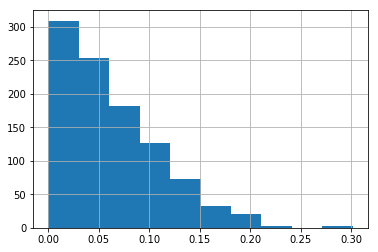

In [25]:
pd.Series(mean_diffs).hist()

#### Hypothesis testing step 4
Compare the difference in means from the data with the histogram.  Does your data test statistic look like it comes from the histogram distribution?

Reject or fail to reject the null hypothesis.

If you have time, create and test another hypothesis for the green taxi trip data.